In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 69 kB 9.5 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=626634 sha256=3cccd102f5149d8bbcc7a6c76b3308d388f95cd9f078b0b89c09d2625fbf5817
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2022.1.9-py2.py3-none-any.whl size=64666 sha256=f270f44e85a12376cd54d6d0d09fe649e0340acd36f28b69f0f68cd4a898044a
  Stored in directory: /root/.cache/pip/wheels/11/d8/85/01a8cf50977badf2da880865124b159b112b861655a9b631d3
Successfully built pycuda pytools


In [ ]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from time import time
from pycuda.elementwise import ElementwiseKernel
import matplotlib.pyplot as plt

# Using PyCUDA's ElementWiseKernel for performing pointwise computations

In [ ]:
host_data = np.float32(np.random.random(50000000))
gpu_2x_ker = ElementwiseKernel(
    "float *in, float *out",
    "out[i] = 2 * in[i];",
    "gpu_2x_ker"
)

In [ ]:
def speedcomparison():
    t1 = time()
    host_data_2x = host_data * np.float32(2)
    t2 = time()

    print(f"total time to compute on CPU: {round(t2 - t1, 4)}")

    device_data = gpuarray.to_gpu(host_data)
    
    # allocate memory for output
    device_data_2x = gpuarray.empty_like(device_data)
    
    t1 = time()
    gpu_2x_ker(device_data, device_data_2x)
    t2 = time()
    from_device = device_data_2x.get()
    # t2 = time()

    print(f"total time to compute on GPU: {round(t2 - t1, 4)}")
    print(f"Is the host computation the same as the GPU computation?: {np.allclose(from_device, host_data_2x)}")

In [ ]:
speedcomparison()

total time to compute on CPU: 0.0376
total time to compute on GPU: 0.0001
Is the host computation the same as the GPU computation?: True


# Mandelbrot revisited

In [ ]:
x = np.matrix(np.linspace(0,10,11))
y = np.matrix(np.linspace(0,10,11))
z = x + y.T * 1j
z

matrix([[ 0. +0.j,  1. +0.j,  2. +0.j,  3. +0.j,  4. +0.j,  5. +0.j,
          6. +0.j,  7. +0.j,  8. +0.j,  9. +0.j, 10. +0.j],
        [ 0. +1.j,  1. +1.j,  2. +1.j,  3. +1.j,  4. +1.j,  5. +1.j,
          6. +1.j,  7. +1.j,  8. +1.j,  9. +1.j, 10. +1.j],
        [ 0. +2.j,  1. +2.j,  2. +2.j,  3. +2.j,  4. +2.j,  5. +2.j,
          6. +2.j,  7. +2.j,  8. +2.j,  9. +2.j, 10. +2.j],
        [ 0. +3.j,  1. +3.j,  2. +3.j,  3. +3.j,  4. +3.j,  5. +3.j,
          6. +3.j,  7. +3.j,  8. +3.j,  9. +3.j, 10. +3.j],
        [ 0. +4.j,  1. +4.j,  2. +4.j,  3. +4.j,  4. +4.j,  5. +4.j,
          6. +4.j,  7. +4.j,  8. +4.j,  9. +4.j, 10. +4.j],
        [ 0. +5.j,  1. +5.j,  2. +5.j,  3. +5.j,  4. +5.j,  5. +5.j,
          6. +5.j,  7. +5.j,  8. +5.j,  9. +5.j, 10. +5.j],
        [ 0. +6.j,  1. +6.j,  2. +6.j,  3. +6.j,  4. +6.j,  5. +6.j,
          6. +6.j,  7. +6.j,  8. +6.j,  9. +6.j, 10. +6.j],
        [ 0. +7.j,  1. +7.j,  2. +7.j,  3. +7.j,  4. +7.j,  5. +7.j,
          6. +7.j,  7. +7.j,

In [ ]:
x_, y_ = np.mgrid[0:11:1,0:11:1]
z_ = x_ + y_ * 1j
z_

array([[ 0. +0.j,  0. +1.j,  0. +2.j,  0. +3.j,  0. +4.j,  0. +5.j,
         0. +6.j,  0. +7.j,  0. +8.j,  0. +9.j,  0.+10.j],
       [ 1. +0.j,  1. +1.j,  1. +2.j,  1. +3.j,  1. +4.j,  1. +5.j,
         1. +6.j,  1. +7.j,  1. +8.j,  1. +9.j,  1.+10.j],
       [ 2. +0.j,  2. +1.j,  2. +2.j,  2. +3.j,  2. +4.j,  2. +5.j,
         2. +6.j,  2. +7.j,  2. +8.j,  2. +9.j,  2.+10.j],
       [ 3. +0.j,  3. +1.j,  3. +2.j,  3. +3.j,  3. +4.j,  3. +5.j,
         3. +6.j,  3. +7.j,  3. +8.j,  3. +9.j,  3.+10.j],
       [ 4. +0.j,  4. +1.j,  4. +2.j,  4. +3.j,  4. +4.j,  4. +5.j,
         4. +6.j,  4. +7.j,  4. +8.j,  4. +9.j,  4.+10.j],
       [ 5. +0.j,  5. +1.j,  5. +2.j,  5. +3.j,  5. +4.j,  5. +5.j,
         5. +6.j,  5. +7.j,  5. +8.j,  5. +9.j,  5.+10.j],
       [ 6. +0.j,  6. +1.j,  6. +2.j,  6. +3.j,  6. +4.j,  6. +5.j,
         6. +6.j,  6. +7.j,  6. +8.j,  6. +9.j,  6.+10.j],
       [ 7. +0.j,  7. +1.j,  7. +2.j,  7. +3.j,  7. +4.j,  7. +5.j,
         7. +6.j,  7. +7.j,  7. +8.j,  7. +

In [ ]:
mandel_ker = ElementwiseKernel(
    "pycuda::complex<float> *lattice, float *mandelbrot_graph, int max_iters, float upper_bound",
    """
    mandelbrot_graph[i] = 1;
    pycuda::complex<float> c = lattice[i];
    pycuda::complex<float> z = 0.0;
    for (int j = 0; j < max_iters; j++)
    {
        z = z*z + c;
        if (abs(z) > upper_bound)
        {
            mandelbrot_graph[i] = 0;
            break;
        }
    }
    """,
    "mandel_ker"
)

def gpu_mandelbrot(width, height, real_low, real_high, imag_low, imag_high, max_iters, upper_bound):
    real_vals = np.matrix(np.linspace(real_low, real_high, width), dtype=np.complex64)
    imag_vals = np.matrix(np.linspace(imag_low, imag_high, height), dtype=np.complex64)
    mandelbrot_lattice = np.array(real_vals + imag_vals.T * 1j, dtype=np.complex64)

    # copy complex lattice to the GPU
    mandelbrot_lattice_gpu = gpuarray.to_gpu(mandelbrot_lattice)
    # allocate an empty array on the GPU
    mandelbrot_graph_gpu = gpuarray.empty(shape=mandelbrot_lattice.shape, dtype=np.float32)

    mandel_ker(mandelbrot_lattice_gpu, mandelbrot_graph_gpu, np.int32(max_iters), np.float32(upper_bound))
    mandelbrot_graph = mandelbrot_graph_gpu.get()
    return mandelbrot_graph

It took 0.008082389831542969 seconds to calculate the Mandelbrot graph.
It took 0.012177705764770508 seconds to dump the image.


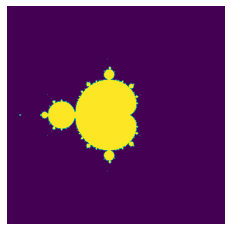

In [ ]:
if __name__ == "__main__":
    t1 = time()
    mandel = gpu_mandelbrot(512,512,-2,2,-2,2,256,2)
    t2 = time()
    mandel_time = t2 - t1

    t1 = time()
    fig = plt.figure(1)
    plt.imshow(mandel, extent=(-2,2,-2,2))
    plt.axis("off")
    t2 = time()
    dump_time = t2 - t1

    print(f"It took {mandel_time} seconds to calculate the Mandelbrot graph.")
    print(f"It took {dump_time} seconds to dump the image.")

# A brief foray into functional programming

In [ ]:
pow2 = lambda x : x**2
print(pow2(2))
print(pow2(3))
print(pow2(4))

4
9
16


In [ ]:
list(map(lambda x : x**2, [2,3,4]))

[4, 9, 16]

# Parallel scan and reduction kernel basics

In [ ]:
from pycuda.scan import InclusiveScanKernel

In [ ]:
seq = np.array([1,2,3,4], dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
sum_gpu = InclusiveScanKernel(np.int32, "a+b")
print(sum_gpu(seq_gpu).get())
print(np.cumsum(seq))

[ 1  3  6 10]
[ 1  3  6 10]


In [ ]:
seq = np.array([1, 100, -3, -10000, 4, 10000, 66, 14, 21], dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
max_gpu = InclusiveScanKernel(np.int32, "a > b ? a : b")
print(max_gpu(seq_gpu).get()[-1])
print(np.max(seq))

10000
10000


In [ ]:
from pycuda.reduction import ReductionKernel

In [ ]:
dot_prod = ReductionKernel(np.float32, neutral="0", reduce_expr="a+b", map_expr="vec1[i]*vec2[i]", arguments="float *vec1, float *vec2")

In [ ]:
x = np.float32(np.random.rand(1000))
y = np.float32(np.random.rand(1000))
x_gpu = gpuarray.to_gpu(x)
y_gpu = gpuarray.to_gpu(y)

z = np.dot(x, y)
z_from_gpu = dot_prod(x_gpu, y_gpu).get()

np.allclose(z, z_from_gpu)
print(z)
print(z_from_gpu)

243.95079
243.95078


# Kernels, Threads, Blocks, and Grids

The learning outcomes for this chapter are as follows:
* Understanding the difference between a kernel and a device function
* How to compile and launch a kernel in PyCUDA and use a device function within a kernel
* Effectively using threads, blocks, and grids in the context of launching a kernel and how to use __threadIdx__ and __blockIdx__ within a kernel
* How and why to synchronize threads within a kernel, using both __syncthreads() for synchronizing all threads among a single block and the host to synchronize all threads among an entire grid of blocks
* How to use device global and shared memory for intra-thread communication
* How to use all of our newly acquired knowledge about kernels to properly implement a GPU version of the parallel prefix sum

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
import pycuda.driver as drv
from pycuda.compiler import SourceModule

In [ ]:
ker = SourceModule(
    """
    __global__ void scalar_multiply_kernel(float *outvec, float scalar, float *vec)
    {
        int i = threadIdx.x;
        outvec[i] = scalar * vec[i];
    }
    """
)

In [ ]:
scalar_multiply_gpu = ker.get_function("scalar_multiply_kernel")

In [ ]:
testvec = np.float32(np.random.randn(512))
testvec_gpu = gpuarray.to_gpu(testvec)
outvec_gpu = gpuarray.empty_like(testvec_gpu)

scalar_multiply_gpu(outvec_gpu, np.float32(2), testvec_gpu, block=(512,1,1), grid=(1,1,1))

print(f"Does our kernel work correctly?: {np.allclose(outvec_gpu.get(), 2 * testvec)}")

Does our kernel work correctly?: True


# Conway's game of life

* Any live cell with fewer than two live neighbors dies
* Any live cell with two or three neighbors lives
* Any live cell with more than three neighbors dies
* Any dead cell with exactly three neighbors comes to life

In [ ]:
import matplotlib.animation as animation

In [ ]:
ker = SourceModule(
    """
    #define _X (threadIdx.x + blockIdx.x * blockDim.x)
    #define _Y (threadIdx.y + blockIdx.y * blockDim.y)

    #define _WIDTH (blockDim.x * gridDim.x)
    #define _HEIGHT (blockDim.y * gridDim.y)

    #define _XM(x) ((x + _WIDTH) % _WIDTH)
    #define _YM(y) ((y + _HEIGHT) % _HEIGHT)

    #define  _INDEX(x,y) (_XM(x) + _YM(y) * _WIDTH)

    __device__ int nbrs(int x, int y, int *in)
    {
        return (in[_INDEX(x-1,y+1)] + in[_INDEX(x-1,y)] + in[_INDEX(x-1,y-1)]\
              + in[_INDEX(x  ,y+1)] + in[_INDEX(x  ,y)] + in[_INDEX(x  ,y-1)]\
              + in[_INDEX(x+1,y+1)] + in[_INDEX(x+1,y)] + in[_INDEX(x+1,y-1)]);
    }

    __global__ void conway_ker(int *lattice_out, int *lattice)
    {
        // x, y are the appropriate values for the cell covered by this thread
        int x = _X;
        int y = _Y;

        // count the number of neighbors around the current cell
        int n = nbrs(x, y, lattice);

        // if the current cell is alive, then determine if it lives or dies for the next generation.
        if (lattice[_INDEX(x,y)] == 1)
            switch(n)
        {
            //if the cell is alive: it remains alive only if it has 2 or 3 neighbors.
            case 2:
            case 3: lattice_out[_INDEX(x,y)] = 1;
                    break;
            default: lattice_out[_INDEX(x,y)] = 0;
        }
        else if (lattice[_INDEX(x,y)] == 0)
            switch(n)
        {
            // a dead cell comes to life only if it has 3 neighbors that are alive.
            case 3: lattice_out[_INDEX(x,y)] = 1;
                    break;
            default: lattice_out[_INDEX(x,y)] = 0;
        }
    }
    """
)

conway_ker = ker.get_function("conway_ker")

In [ ]:
def update_gpu(frameNum, img, newLattice_gpu, lattice_gpu, N):

    conway_ker(newLattice_gpu, lattice_gpu, grid=(int(N/32),int(N/32),1), block=(32,32,1))

    img.set_data(newLattice_gpu.get())
    lattice_gpu[:] = newLattice_gpu[:]
    return img

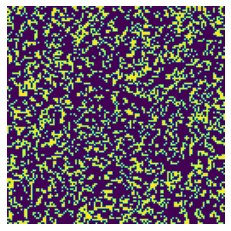

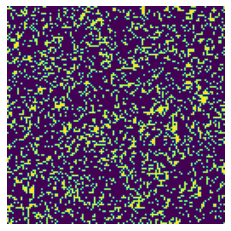

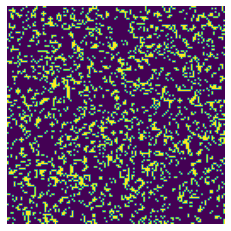

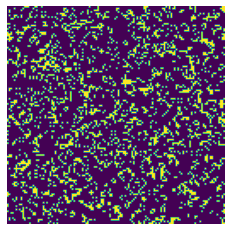

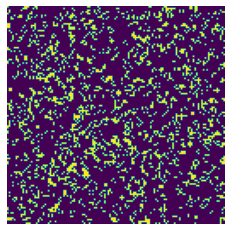

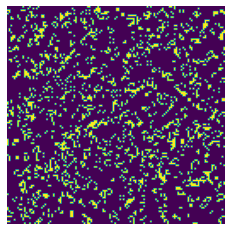

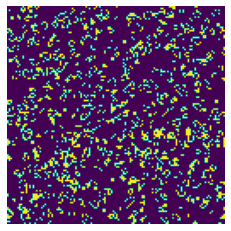

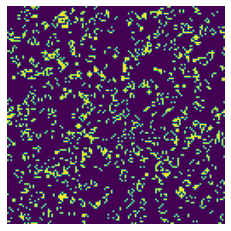

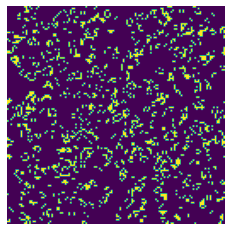

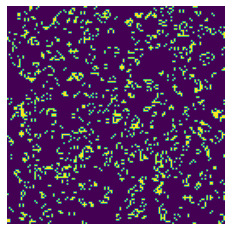

In [ ]:
if __name__ == "__main__":
    # set lattice size
    N = 128

    lattice = np.int32(np.random.choice([0,1], N*N, p=[0.75,0.25]).reshape(N,N))

    lattice_gpu = gpuarray.to_gpu(lattice)
    newLattice_gpu = gpuarray.empty_like(lattice_gpu)

    fig, ax = plt.subplots()

    t = 0
    while t < 10:
        ax.cla()

        conway_ker(newLattice_gpu, lattice_gpu, grid=(int(N/32),int(N/32),1), block=(32,32,1))
        lattice_gpu[:] = newLattice_gpu[:]
        img = newLattice_gpu.get()
        
        plt.imshow(img)
        plt.axis("off")

        t += 1
                
        plt.pause(0.1)
    plt.show()